In [1]:
from sklearn.decomposition import NMF
from utils import load_data, load_json, retrieve_docs, precision_recall, vector_space_cos
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def approximate_matrix(A, k):
    model = NMF(n_components=k, init='random', random_state=0, max_iter=100)
    W = model.fit_transform(A)
    H = model.components_
    return W, H

In [3]:
def cos_distance(Q, R, h_j, q):
    q_hat = np.linalg.solve(R, Q.T @ q)
    return q_hat.T @ h_j / (np.linalg.norm(q_hat) * np.linalg.norm(h_j))

In [4]:
data_path = r"../data/text-mining-medline_stemmed.mat"
data = load_data(data_path)
A = data["A"].A
q = data["q"].A
W, H = approximate_matrix(A, 50)
Q, R = np.linalg.qr(W)
print("Q shape: ", Q.shape)
print("R shape: ", R.shape)
m_q, n_q = q.shape
m_h, n_h = H.shape
distance_matrix = np.zeros((n_q, n_h))
vector_space_distance_matrix = np.zeros((n_q, n_h))
for i in range(n_q):
    for j in range(n_h):
        cos_dist = cos_distance(Q, R, H[:, j], q[:, i])
        vector_space_distance = vector_space_cos(A[:,j], q[:, i])
        distance_matrix[i][j] = cos_dist
        vector_space_distance_matrix[i][j] = vector_space_distance


C:\Users\akram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


Q shape:  (4163, 50)
R shape:  (50, 50)


In [6]:
q_9_distances = distance_matrix[8]
q_9_distances_vector_space = vector_space_distance_matrix[8]

In [5]:

json_dict = load_json(r"../data\med\MED.json")

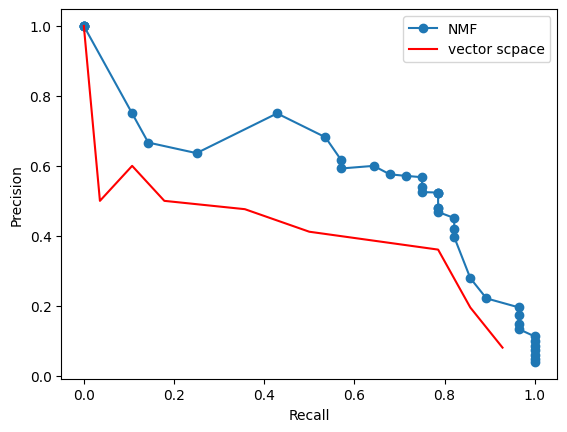

In [7]:
#try to plot precision and recall for query 9
tol = np.linspace(.0, 1.0, 40)
precision = []
recall = []
vs_precision = []
vs_recall = []
for t in tol:
    retrieved_docs = retrieve_docs(q_9_distances, t)
    vs_retrieved_docs = retrieve_docs(q_9_distances_vector_space, t)
    precision_value, recall_value = precision_recall(json_dict, "9", retrieved_docs)
    vs_precision_value, vs_recall_value = precision_recall(json_dict, "9", vs_retrieved_docs)
    precision.append(precision_value)
    recall.append(recall_value)
    vs_precision.append(vs_precision_value)
    vs_recall.append(vs_recall_value)

plt.plot(recall, precision, "o-", label="NMF")
plt.plot(vs_recall, vs_precision, "r", label="vector scpace")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()
